In [1]:
#Raw Data and Initialization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import sklearn
#profiler = pd.read_csv("Finalised_Data.csv")
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Data processing
data = pd.read_csv('Boyd_data.csv')
# transform the training dataset
Features = data.drop(['Chla_low', "Chla_mean",'Chla_upper','Chla_Sensor','Chla_upper','Chla_Sensor'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(Features[['Temperature', 'Turbidity (FNU)', 'DisOxygen Sat', 'DissOxygen (mg/l)', 'ORP (mV)', 'SpCond (us/cm)', 'pH']],
                                                    data["Chla_mean"], train_size=0.8, random_state=123)
from sklearn.preprocessing import MinMaxScaler
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

In [5]:
#%% Random Search with Cross Validation
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [6]:
#%% Use the random grid to search for best hyperparameters
# First create the base model to tune
RF_random = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=RF_random, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train_scaled);
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 27.0min
/software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2020.07-4obfocw3kpymwz7obsjukroelfwutobz/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 127.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 291.2min finished
/software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2020.07-4obfocw3kpymwz7obsjukroelfwutobz/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [4]:
#%% GRID SEARCH FOR BEST HYPERPARAMETERS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [300, 400, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_scaled)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

NameError: name 'evaluate_tr' is not defined

In [4]:
#%% EVALUATE FUNCTION
def evaluate(best_grid, X_test_scaled, y_test_scaled):
    predictions = best_grid.predict(X_test_scaled)
    predictions = predictions.reshape(-1,1)
    real = scaler_y.inverse_transform(y_test_scaled)
    predictions = scaler_y.inverse_transform(predictions)
    RMSE_RF = metrics.mean_squared_error(y_test, predictions,squared=True)
    MAE_RF = metrics.mean_absolute_error(y_test, predictions)
    RSQUARED_RF = metrics.r2_score(y_test, predictions)
    Ht = pd.DataFrame(y_test_scaled)
    Gt = pd.DataFrame(predictions)
    #correlation_tr = pearsonr(Ht[0],Gt[0])
    Metrics_RF = [RMSE_RF, RSQUARED_RF, MAE_RF ]
    print(Metrics_RF)
    return Metrics_RF


def evaluate_tr(best_grid, X_train_scaled, y_train_scaled):
    predictions = best_grid.predict(X_train_scaled)
    predictions = predictions.reshape(-1,1)
    real = scaler_y.inverse_transform(y_train_scaled)
    predictions = scaler_y.inverse_transform(predictions)
    RMSE_RF = metrics.mean_squared_error(y_train, predictions,squared=True)
    MAE_RF = metrics.mean_absolute_error(y_train, predictions)
    RSQUARED_RF = metrics.r2_score(y_train, predictions)
    Ht = pd.DataFrame(y_train_scaled)
    Gt = pd.DataFrame(predictions)
    #correlation_tr = pearsonr(Ht[0],Gt[0])
    Metrics_RF = [RMSE_RF, RSQUARED_RF, MAE_RF]
    print(Metrics_RF)
    return Metrics_RF

In [7]:
#best_grid = grid_search.best_estimator_
#pprint(best_grid)
grid_accuracy_train = evaluate_tr(best_grid, X_train_scaled, y_train_scaled)
grid_accuracy = evaluate(best_grid, X_test_scaled, y_test_scaled)

[5.8626756115849915e-08, 0.999999997732712, 9.574045544261812e-07]
[3.557455208786799, 0.8598148133488023, 0.966516561110098]


In [8]:
y_test.to_csv('RF80obs.csv', index=False)
predictions = best_grid.predict(X_test_scaled)
predictions = predictions.reshape(-1,1)
predictions = scaler_y.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)
predictions.to_csv('RF80pred.csv', index=False)

In [8]:
#Saving model 
import pickle
#Pkl_Filename = "RF_70/30.pkl"  
with open("RF_model80", 'wb') as file:  
    pickle.dump(best_grid, file)

In [8]:
#Loading Model
import pickle
#Pkl_Filename = "RF_Model_bestgrid.pkl"
with open("RF_model70", 'rb') as file:  
    best_grid = pickle.load(file)

/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/envs/pytorch_workshop/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/envs/pytorch_workshop/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
best_grid.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=False, max_depth=110, max_features='sqrt',
                      n_estimators=500)>

In [9]:
#%% EVALUATING DEFAULT MODEL
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_scaled, y_train_scaled)
base_accuracy = evaluate(base_model, X_test_scaled, y_test_scaled)
base_accuracy_train = evaluate_tr(base_model, X_train_scaled, y_train_scaled)

NameError: name 'RandomForestRegressor' is not defined

In [9]:
true_value = y_test
Pred = best_grid.predict(X_test_scaled)
prediction =pd.DataFrame(Pred)
predicted_value = scaler_y.inverse_transform(prediction)
predicted_value = pd.DataFrame(predicted_value)
true_value.columns = y_test.columns
predicted_value.columns = y_test.columns

In [10]:
predicted_value.columns = ['Chla_mean']
true_value.columns = ['Chla_mean']

Text(0, 0.5, 'Predicted Chlorophyll (μg/l)')

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

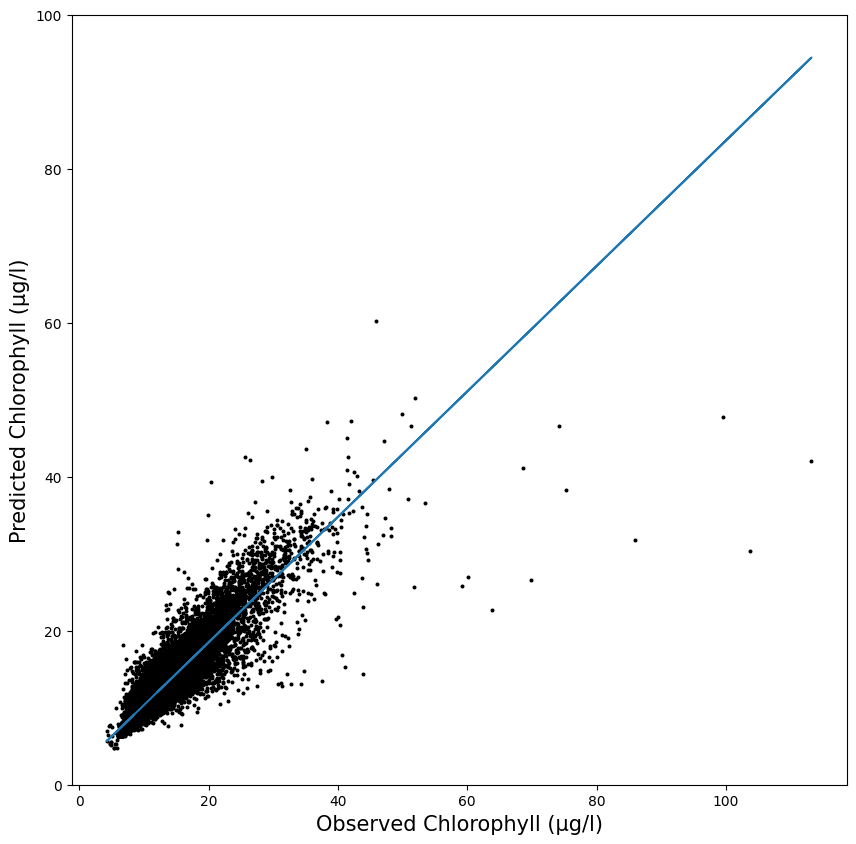

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(true_value ["Chla_mean"], predicted_value["Chla_mean"], c='black',s=3.5)
plt.ylim([0, 100])
x = true_value ["Chla_mean"]
y = predicted_value["Chla_mean"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, (m*x)+b, label='y={:.2f}x+{:.2f}'.format(m,b))
#plt.text(20,85, 'R-squared = 0.84', fontsize = 25)
plt.xlabel('Observed Chlorophyll (μg/l)', fontsize=15)
plt.ylabel('Predicted Chlorophyll (μg/l)', fontsize=15)